In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean
import json
import f90nml
from collections import OrderedDict

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

In [2]:
PATH= '/results2/SalishSea/nowcast-green.201905/'

In [4]:
start_date = dt.datetime(2015,3,1)
end_date = dt.datetime(2015,3,31)
flen=1
namfmt='nowcast'
filemap={'vosaline':'grid_T','votemper':'grid_T'}
fdict={'ptrc_T':1,'grid_T':1}
#basedir='/data/eolson/results/MEOPAR/tempDBs/',dbname='DFO.sqlite',       
df1=et.loadDFOCTD(datelims=(start_date,end_date))
print(len(df1),'data points')
df1.head()

9092 data points


,Year,Month,Day,Hour,Lat,Lon,Z,SA,CT,Fluor,dtUTC
0,2015.0,3.0,6.0,15.276944,50.346333,-125.431167,2.974171,29.124678,8.853510,0.460,2015-03-06 15:16:37
1,2015.0,3.0,6.0,15.276944,50.346333,-125.431167,3.965552,29.125241,8.859852,0.520,2015-03-06 15:16:37
2,2015.0,3.0,6.0,15.276944,50.346333,-125.431167,4.956927,29.126406,8.872634,0.514,2015-03-06 15:16:37
3,2015.0,3.0,6.0,15.276944,50.346333,-125.431167,5.948298,29.126868,8.874141,0.539,2015-03-06 15:16:37
4,2015.0,3.0,6.0,15.276944,50.346333,-125.431167,6.939665,29.126124,8.868916,0.519,2015-03-06 15:16:37


In [5]:
data=et.matchData(df1,filemap,fdict,start_date,end_date,'nowcast',PATH,1,quiet=True);

progress: 0.0%
progress: 57.44485294117647%


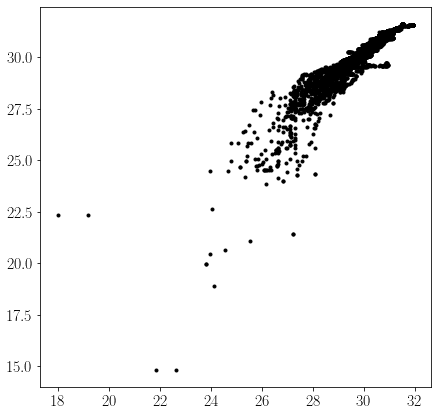

In [7]:
obsvar='SA'
modvar='mod_vosaline'
fig, ax = plt.subplots(1,1,figsize = (7,7))
ax.plot(data[obsvar],data[modvar],'k.')